In [42]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

import sys
from paths import Paths
paths = Paths()
sys.path.append(paths.scripts_root)
import util

import imutils

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

paths.print_paths()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Paths defined in paths module:
 paths.inhouse: /Users/trafferty/dev/src/inhouse
 paths.tmp_dir: /Users/trafferty/tmp
 paths.projects_root: /Users/trafferty/data/projects
 paths.ws_dir: /Users/trafferty/workspace
 paths.results_root: /Users/trafferty/data/results
 paths.data_root: /Users/trafferty/data
 paths.scripts_root: /Users/trafferty/data/scripts
 paths.notebook_root: /Users/trafferty/data/notebooks
 paths.tmp_root: /Users/trafferty/data/tmp
 paths.images_root: /Users/trafferty/data/images
 paths.mii_home: /Users/trafferty/dev


### Read in the RAW and JPEG version of the same image

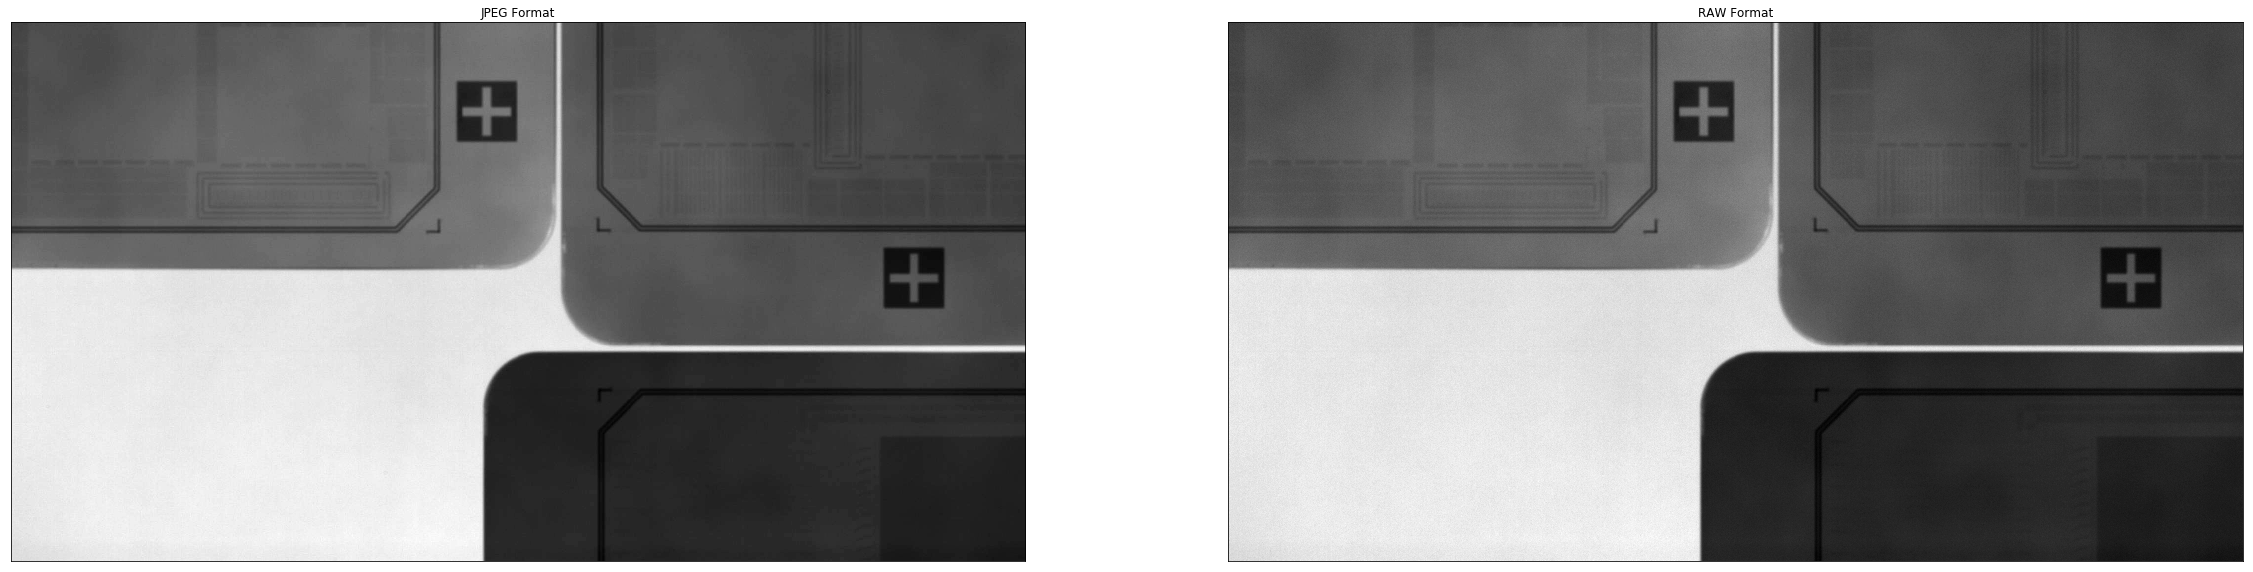

In [44]:
file_base = 'A2-IP_OAS-20180514_181049_842394+0900-w1-p1-sna-f1-1r1-2r96364-2048x1088'
jpg = cv2.imread(paths.images_root+'/extrusion/raw_vs_jpeg/%s.jpg' % (file_base) ,cv2.IMREAD_GRAYSCALE)

rows = 1088
cols = 2048
rawpath = paths.images_root+'/extrusion/raw_vs_jpeg/%s.raw' % (file_base)
raw = util.readRaw(rawpath, rows, cols)

#util.plot_imgs([(imutils.rotate_bound(jpg, 90),'JPEG Format'), (imutils.rotate_bound(raw, 90),'RAW Format')], max_cols = 2, fig_size = 20)
util.plot_imgs([(jpg,'JPEG Format'), (raw,'RAW Format')], max_cols = 2, fig_size = 20)

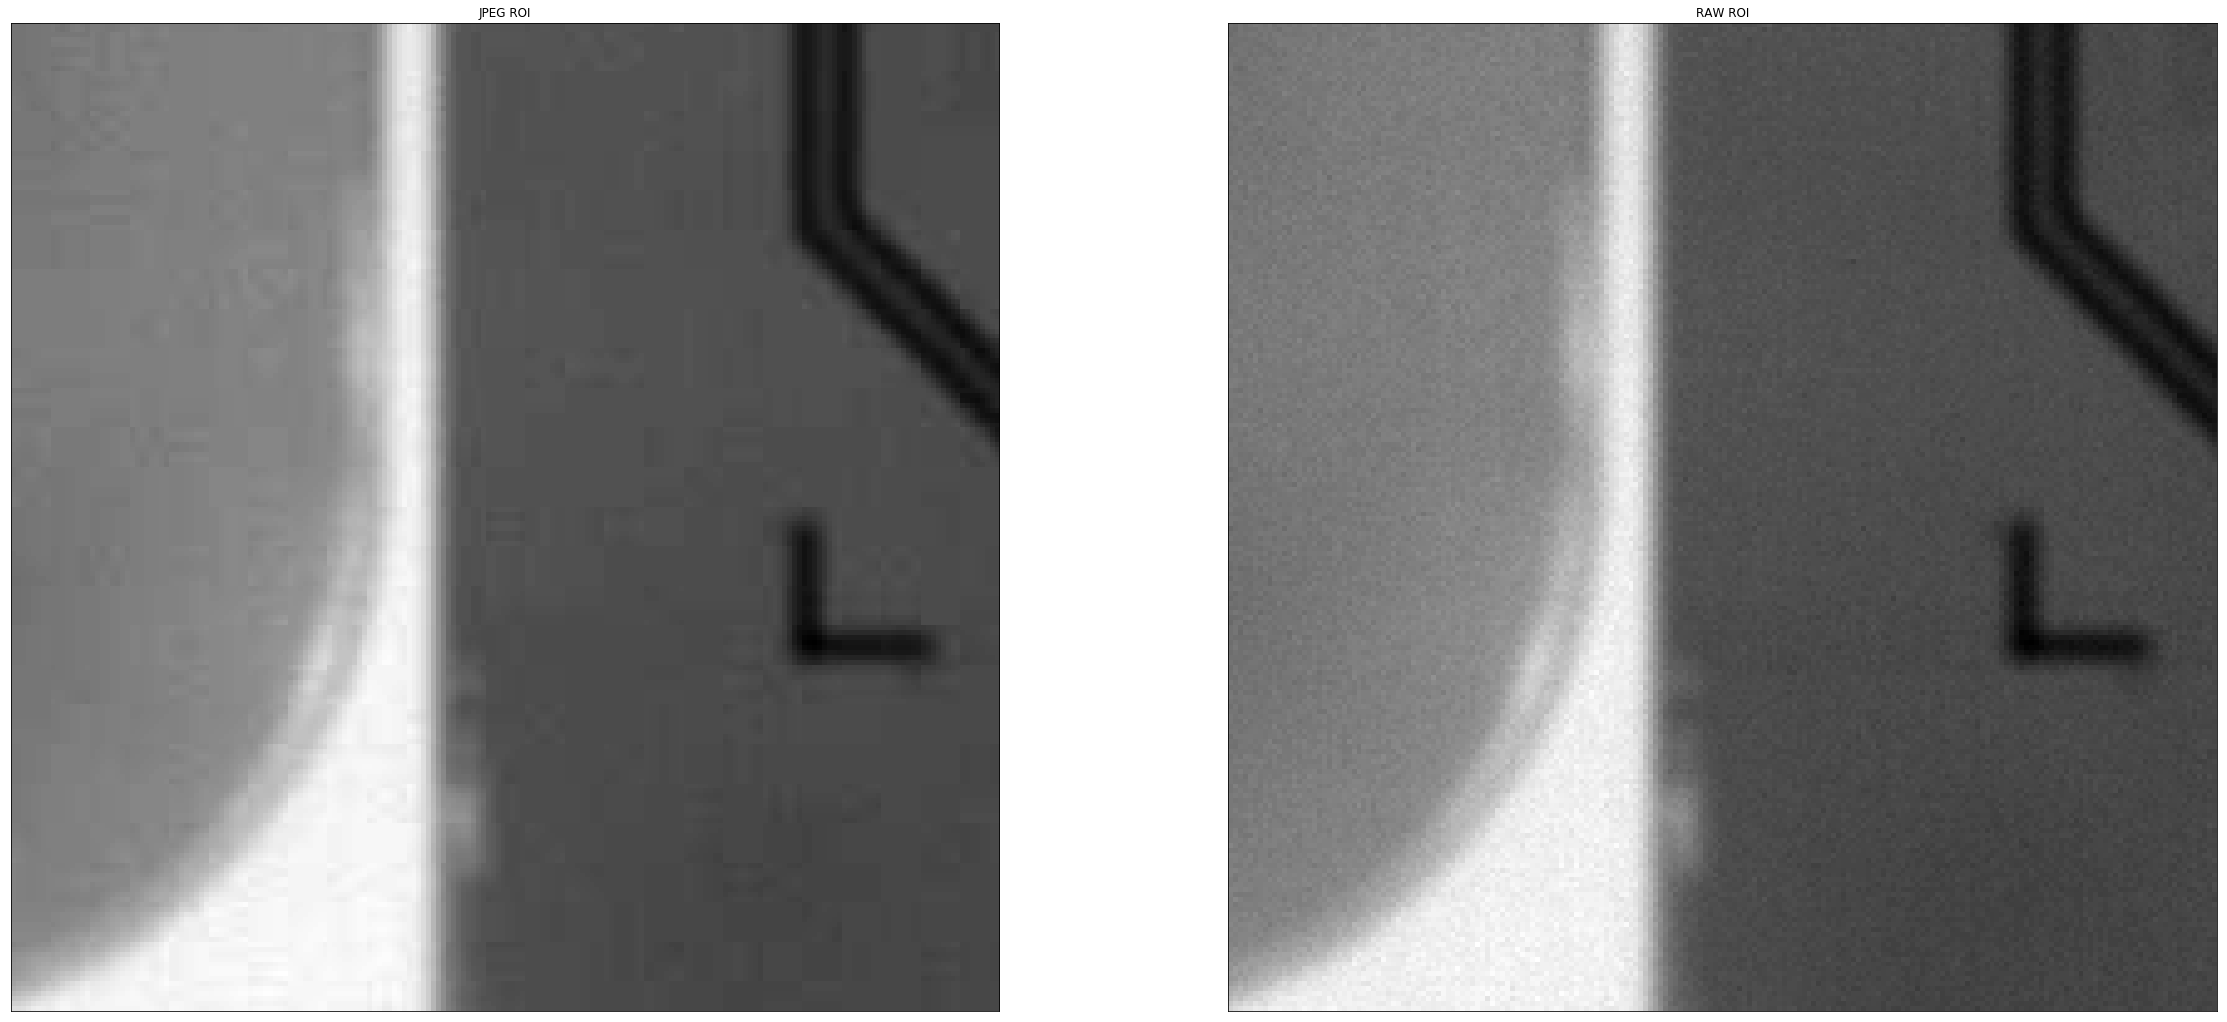

In [32]:
rows, cols = jpg.shape
midX, midY = int(cols/2), int(rows/2)

width = 200
offsetX = 100
offsetY = -150
Y = midY+offsetY
X = midX+offsetX
startY = int(Y - (width/2))
endY   = int(Y + (width/2))
startX = int(X - (width/2))
endX   = int(X + (width/2))

jpg_roi = jpg[startY:endY, startX:endX]
raw_roi = raw[startY:endY, startX:endX]

util.plot_imgs([(jpg_roi,'JPEG ROI'), (raw_roi,'RAW ROI')], max_cols = 2, fig_size = 20)

Delta value: 9


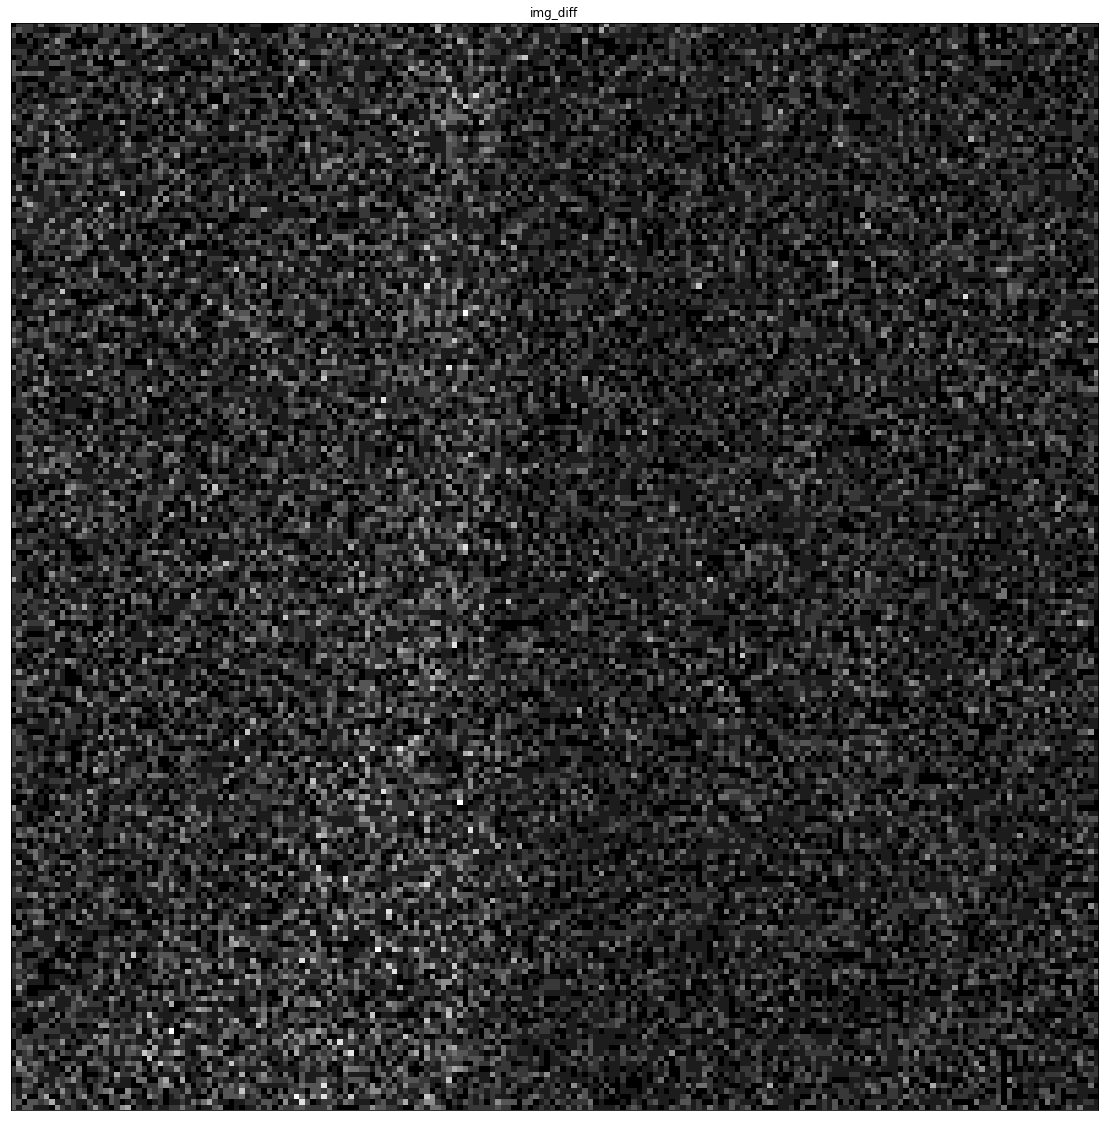

In [35]:
img_diff = cv2.absdiff(jpg_roi, raw_roi)

delta_value = img_diff.max() - img_diff.min()
print("Delta value: %d" % delta_value)

util.plot_imgs([(img_diff,'img_diff')], max_cols = 2, fig_size = 20)